## Math 180 Homework #1

### Problem 1
1. Chess engine. The predictors are in this case the pieces on the chess board and the response is a move. This is a    prediction problem. We just want to know the best move\
    Object identification. The predictors are an image or a video and the response is a text string. Also a prediction problem. We only care about the result\
    Facial recognition. The predictors are images or a video and the response is match/no match. Prediction again, we only need to know wether it's a match or not.
2. Predicting units sold due to advertising. Response i units sold and predictors are advertisement spending. Could be inference if you want to learn the relationship between advertising and units sold, could also be prediction if you only care about the result. \
    Measuring spring force (Hooke's law). Response is the measured force and the predictor is the distance the spring is pulled out. Inference - you want to learn the relationship between force and distance (spring constant). \
    Predicting sick leave in a company. Response is future sick leave and predictor is past sick leave.
3. Finding relationships between genes and different types of cells in the human body. \
    Finding relationships in data collected from cookies and what ads people are most likely to click on. \
    Finding relationships in population data and different types of diseases.

### Problem 2
1. You would create a model that takes wether an actor has appeared in a movie as input X and output the movie revenue Y. Then you run the model on all the actors one at a time and let it predict the revenue of the movie.
2. Prediction. You just use the data to predict how much the movie is going to make. The model could be a ***Black Box***.
3. Regression. The outcome is a quantitative number.

### Problem 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix 

In [2]:
data = pd.read_csv(r"C:\Users\chril\Documents\Python Scripts\Math180HW1\College.csv") #Reads data
# data.iloc[:, 0]
data.index = data.iloc[:, 0] #Makes college names the row names
data = data.drop(data.columns[[0]], axis = 1) #Deletes column with college names
data.describe() #Same as summary() in R


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


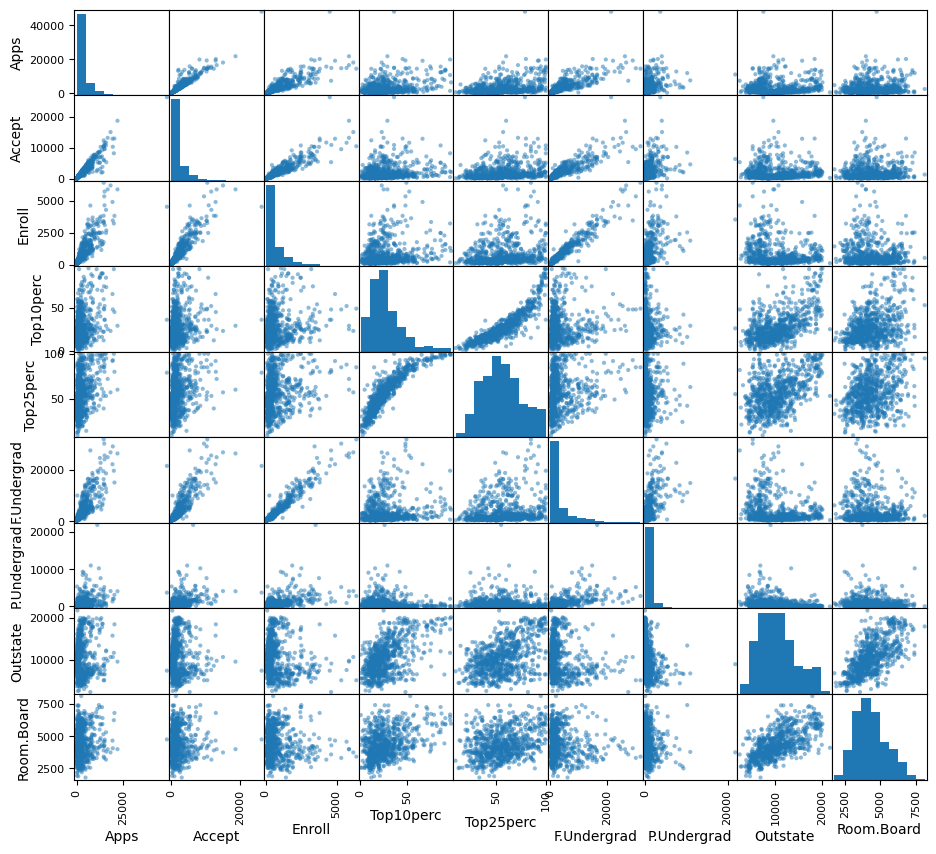

In [3]:
scatter_matrix(data.iloc[:, :10], figsize = [11, 10]) #iloc to only take first 10 columns.
plt.show()

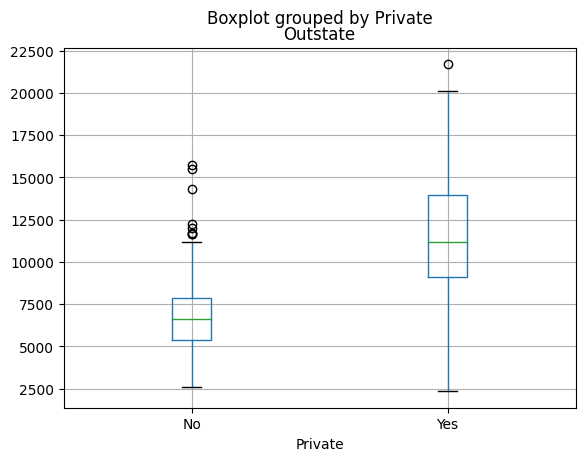

In [4]:
data.boxplot(column = "Outstate", by = "Private")
plt.show()

There are in general a lot more outstate students in private universities. Both the mean, first quartile, 3rd quartile and max values are higher for private unis.

In [5]:
def EliteFunc(row):
    '''Function to create Elite column'''
    if row["Top10perc"] > 50:
        return "Yes"
    else: return "No"
data["Elite"] = data.apply(EliteFunc, axis = 1) #Creates Elite column
# data.describe() only outputs from columns with numbers
len(data[data.Elite == "Yes"]) #Instead I count the amount of rows left, when only Elite status Unis are left.

78

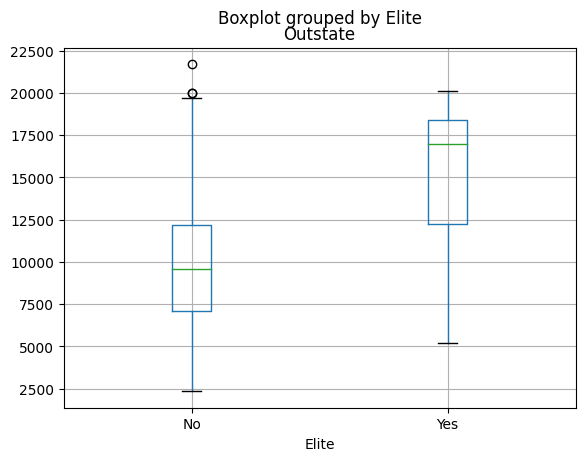

In [6]:
data.boxplot(column = "Outstate", by = "Elite")
plt.show()

Again, there are in general a lot more outstate students in elite universities. Both the mean, first quartile, 3rd quartile and max values are higher for elite unis.

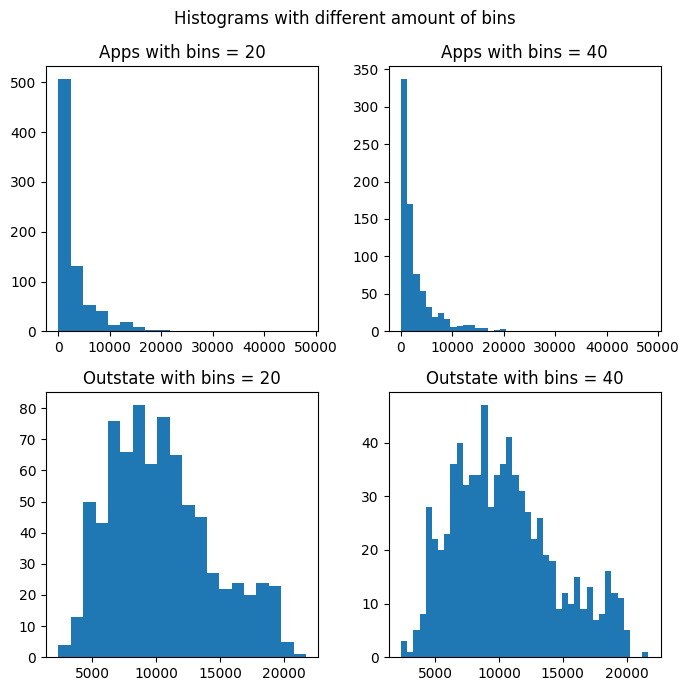

In [7]:
Bins = [20, 40] #The bins i want to use
counter = 0 #To iterate through Bins
quantvariables = ["Apps", "Outstate"]
fig, axs = plt.subplots(2, 2, figsize = (7,7)) #Setting up the plot
fig.set_tight_layout(True)
fig.suptitle("Histograms with different amount of bins")

for i in range(2): #Plots the different histograms in the correct places
    for j in range(2):
        axs[i][j].hist(data[quantvariables[i]], bins = Bins[j])
        axs[i][j].set_title(f"{quantvariables[i]} with bins = {Bins[j]}")
        counter += 1

### Problem 4

In [8]:
Auto = pd.read_csv(r"C:\Users\chril\Documents\Python Scripts\Math180HW1\Auto.csv") #Reads data

for col in Auto.columns[0:8]: #Looks in the first 8 columns and removes non-numeric values
    Auto = Auto[pd.to_numeric(Auto[col], errors='coerce').notnull()]
Auto["horsepower"] = Auto["horsepower"].astype(np.int64) #Converts column to correct type

3. name and origin are qualitative predictors, since they give a description of the vehicle. The rest are quantitative, since they give a value to the vehicle

In [9]:
hp = Auto["horsepower"]
print(
    "min:", np.min(hp), 
      "\nmax:", np.max(hp), 
      "\nmean:", np.mean(hp),
      "\nstandard deviation:", np.std(hp)
      )

min: 46 
max: 230 
mean: 104.46938775510205 
standard deviation: 38.44203271442593


In [10]:
Auto2 = Auto.drop(Auto.index[range(10,85)])

In [11]:
hp = Auto2["horsepower"]
print(
    "min:", np.min(hp), 
      "\nmax:", np.max(hp), 
      "\nmean:", np.mean(hp),
      "\nstandard deviation:", np.std(hp)
      )

min: 46 
max: 230 
mean: 101.0031545741325 
standard deviation: 35.94637597706651


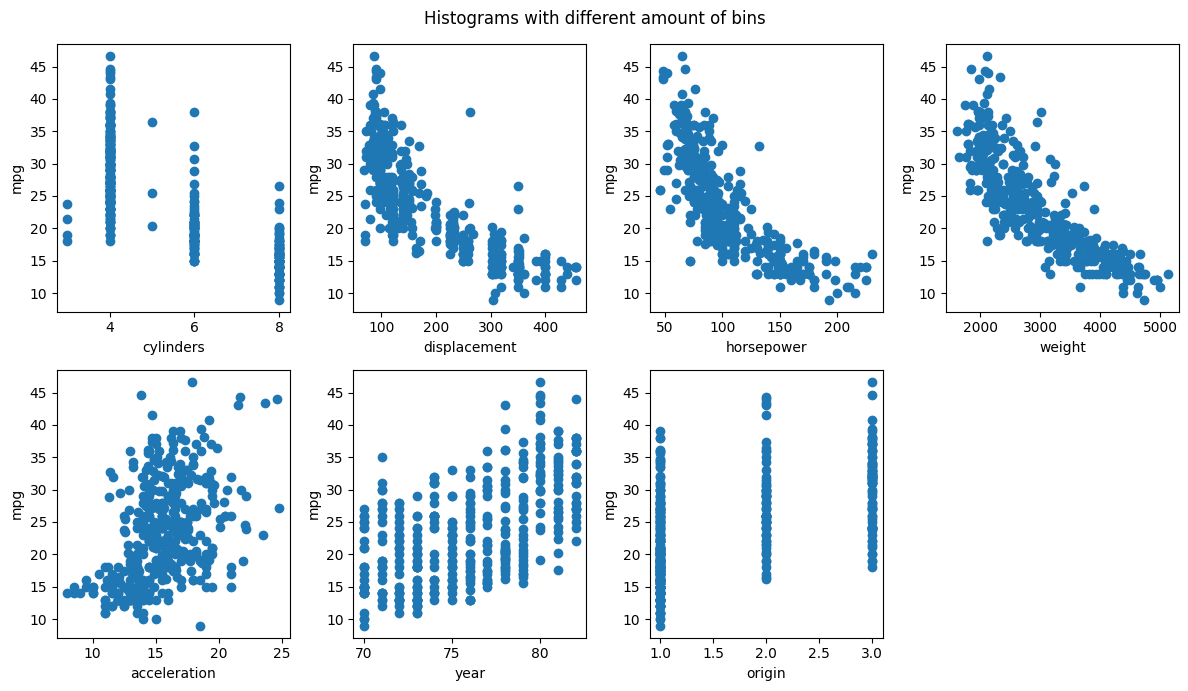

In [12]:
fig, axs = plt.subplots(2, 4, figsize = (12,7)) #Setting up the plot
fig.set_tight_layout(True)
fig.suptitle("Histograms with different amount of bins")

columns = Auto.columns[1:8]
counter = 0
for i in range(2): #Makes all the scatter plots, iterating over the different columns
    for j in range(4):
        axs[i][j].scatter(Auto[columns[counter]], Auto["mpg"])
        axs[i][j].set_ylabel("mpg")
        axs[i][j].set_xlabel(columns[counter])
        counter += 1
        if counter == len(columns): break
fig.delaxes(axs[1][3]) #7 is prime, had to remove last plot..
plt.show() 

6. Displacement, horsepower and weight seem to be really useful in predicting mpg. there are almost no high weight, dipslacement or hp car, that also has a high mph and vice versa.
In the mpg/year plot there is an upward trend, but still fairly high performing old cars and fairly low performing new cars. the same is true for origin, where american made cars can perform significantly worse than asian made cars.
Cylinders also give a small indication, where no 8 cylinder cars perform as well as a median 4 cylinder car.